# Building Artificial Neural Networks (ANN) from Scratch

**Artificial Neural Networks (ANNs)** are a collection of interconnected layers of neurons. It includes:

* Input Layer: Receives input features.
* Hidden Layers: Process information through weighted connections and activation functions.
* Output Layer: Produces the final prediction.
* Weights and Biases: Trainable parameters that adjust during learning.
* Activation Functions: Introduces non-linearity which allows the network to learn complex patterns.

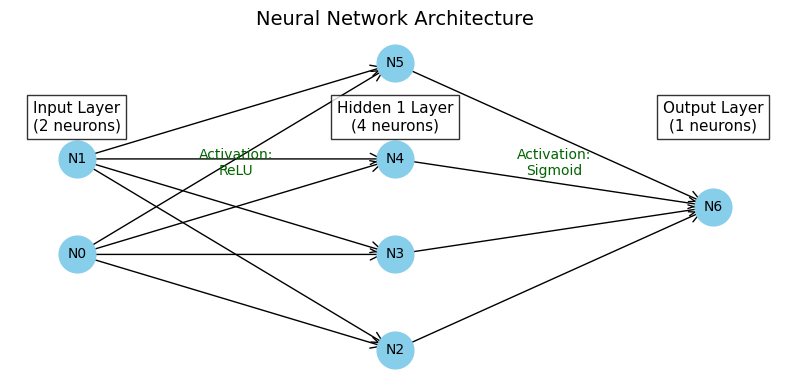

An ANN from scratch using Python and NumPy without relying on deep learning libraries such as TensorFlow or PyTorch.
* This approach will help in better understanding of the workings of neural networks.

In [ ]:
!pip install numpy

Step 1: Importing Necessary Libraries

In [ ]:
import numpy as np

Step 2: Initializing the Neural Network
* Sets initial weights and biases for a two-layer neural network.
* Uses np.random.seed(42) for reproducible results.
* Weights (W1, W2) initialized with small random values scaled by 0.01 to avoid large initial weights.
* W1 shape: (hidden layer size, input layer size).
* W2 shape: (output layer size, hidden layer size).
* Biases (b1, b2) initialized to zero vectors matching their layer sizes.

In [ ]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    parameters = {
        "W1": np.random.randn(hidden_size, input_size) * 0.01,
        "b1": np.zeros((hidden_size, 1)),
        "W2": np.random.randn(output_size, hidden_size) * 0.01,
        "b2": np.zeros((output_size, 1))
    }
    return parameters

Step 3: Defining Activation Functions
**Activation functions** introduce non-linearity into the model, helping it learn complex patterns. We here are using:

* ReLU for the hidden layer
* Sigmoid for the output layer.

In [ ]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))


def relu(Z):
    return np.maximum(0, Z)


def relu_derivative(Z):
    return (Z > 0).astype(int)

Step 4: Forward Propagation
In Forward propagation the function computes the output of the neural network for a given input X and parameters.

* First, it calculates the linear combination Z1 for the hidden layer by multiplying the input X with the weights W1 and adding bias b1.
* It then applies the ReLU activation function to Z1 producing the hidden layer activations A1.
* Next, it calculates the linear combination Z2 for the output layer by multiplying A1 with W2 and adding b2.
* The sigmoid activation function is applied to Z2 to produce the final output A2.
* The function returns the output A2 along with a cache containing intermediate values needed for backpropagation.

In [ ]:
def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

Step 5: Computing the Cost

Cost function calculates the binary cross-entropy loss which measures how well the neural network’s predictions A2 match the true labels Y.

* m is the number of examples.
* np.squeeze removes any extra dimensions, returning the cost as a scalar.

In [ ]:
def compute_cost(Y, A2):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    return np.squeeze(cost)

Step 6: Backpropagation

Backpropagation computes the gradients needed to update the network parameters during training.

* It calculates the error at the output layer (dZ2) as the difference between predicted outputs (A2) and true labels (Y).
* Using this error, it computes gradients of the weights (dW2) and biases (db2) for the output layer.
* Then, it backpropagates the error to the hidden layer by multiplying with the transpose of W2 and element-wise with the derivative of the ReLU activation (relu_derivative).
* Finally, it calculates gradients for the hidden layer weights (dW1) and biases (db1).
* All gradients are averaged over the number of examples m to ensure stable updates.

In [ ]:
def backward_propagation(X, Y, parameters, cache):
    m = X.shape[1]
    W2 = parameters["W2"]

    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2, cache["A1"].T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * relu_derivative(cache["Z1"])
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

Step 7: Updating Parameters

Gradient descent updates the parameters using the computed gradients and a learning rate.

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    for key in parameters.keys():
        parameters[key] -= learning_rate * grads["d" + key]
    return parameters

Step 8: Training the Neural Network

We train the neural network over multiple iterations, updating parameters using backpropagation and gradient descent

In [ ]:
def train_neural_network(X, Y, input_size, hidden_size, output_size, epochs=1000, learning_rate=0.01):
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for i in range(epochs):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(Y, A2)
        grads = backward_propagation(X, Y, parameters, cache)
        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 100 == 0:
            print(f"Epoch {i}: Cost = {cost}")

    return parameters

Step 9: Making Predictions

The trained model predicts outputs by performing forward propagation and applying a threshold of 0.5.

In [ ]:
def predict(X, parameters):
    A2, _ = forward_propagation(X, parameters)
    return (A2 > 0.5).astype(int)

Step 10: Testing the Model

We test the model using an AND logic gate dataset.

In [ ]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 0, 0, 1]])

trained_parameters = train_neural_network(
    X, Y, input_size=2, hidden_size=4, output_size=1, epochs=10000, learning_rate=0.1)

predictions = predict(X, trained_parameters)
print("Predictions:", predictions)

Epoch 0: Cost = 0.693146369355556
Epoch 100: Cost = 0.5639151894233227
Epoch 200: Cost = 0.5565925189740488
Epoch 300: Cost = 0.4644741172097931
Epoch 400: Cost = 0.29516280613637336
Epoch 500: Cost = 0.1579776667730769
Epoch 600: Cost = 0.08563555993338258
Epoch 700: Cost = 0.05288251365109446
Epoch 800: Cost = 0.03704356618451611
Epoch 900: Cost = 0.02905583377309042
Epoch 1000: Cost = 0.02401034841169598
Epoch 1100: Cost = 0.020422312372831625
Epoch 1200: Cost = 0.017694655817974164
Epoch 1300: Cost = 0.015501749759281246
Epoch 1400: Cost = 0.013686620557187959
Epoch 1500: Cost = 0.01220429968875079
Epoch 1600: Cost = 0.010974235562573388
Epoch 1700: Cost = 0.009922426517793716
Epoch 1800: Cost = 0.009037597840418245
Epoch 1900: Cost = 0.008262495265921054
Epoch 2000: Cost = 0.007595727088792033
Epoch 2100: Cost = 0.007011782061884308
Epoch 2200: Cost = 0.006492342970863621
Epoch 2300: Cost = 0.006032762228198714
Epoch 2400: Cost = 0.005624169059161951
Epoch 2500: Cost = 0.005260068

# Another Program Steps and Code (Python)



#### Installation process

In [ ]:
!pip install numpy pandas matplotlib scikit-learn

## 1. Import Libraries and Load Data

The load_iris function from sklearn.datasets is the easiest way to access the data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer


# Load the Iris dataset
iris = load_iris()
X = iris.data # Features: sepal length, sepal width, petal length, petal width
y = iris.target # Target: species (0=setosa, 1=versicolor, 2=virginica)

# One-hot encode labels (3 classes)
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)

# Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data is ready for your scratch implementation!")


Data is ready for your scratch implementation!


## 2. ANN Implementation from Scratch

Here is the full code. It uses NumPy for all the "learning" and Matplotlib to show the loss (which looks great in a GitHub README).

Step 2: Initializing the Neural Network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ANN:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):
        # Initialize weights with small random values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.lr = lr
        self.loss_history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, X, y, epochs=1000):
        for i in range(epochs):
            # Forward Pass
            z1 = np.dot(X, self.W1) + self.b1
            a1 = self.sigmoid(z1)
            z2 = np.dot(a1, self.W2) + self.b2
            a2 = self.sigmoid(z2) # Output layer

            # Compute Loss (Mean Squared Error)
            loss = np.mean(np.square(y - a2))
            self.loss_history.append(loss)

            # Backpropagation (The "Scratch" Math)
            error_out = a2 - y
            d_out = error_out * self.sigmoid_derivative(a2)

            error_hidden = d_out.dot(self.W2.T)
            d_hidden = error_hidden * self.sigmoid_derivative(a1)

            # Update Weights and Biases
            self.W2 -= a1.T.dot(d_out) * self.lr
            self.b2 -= np.sum(d_out, axis=0, keepdims=True) * self.lr
            self.W1 -= X.T.dot(d_hidden) * self.lr
            self.b1 -= np.sum(d_hidden, axis=0, keepdims=True) * self.lr

    def predict(self, X):
        a1 = self.sigmoid(np.dot(X, self.W1) + self.b1)
        a2 = self.sigmoid(np.dot(a1, self.W2) + self.b2)
        return np.argmax(a2, axis=1)

Step 5: Testing the Model

In [ ]:
# Initialize and Train
model = ANN(input_size=4, hidden_size=8, output_size=3, lr=0.1)
model.train(X_train, y_train, epochs=2000)

In [ ]:
# Check Accuracy
predictions = model.predict(X_test)
actual = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == actual)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


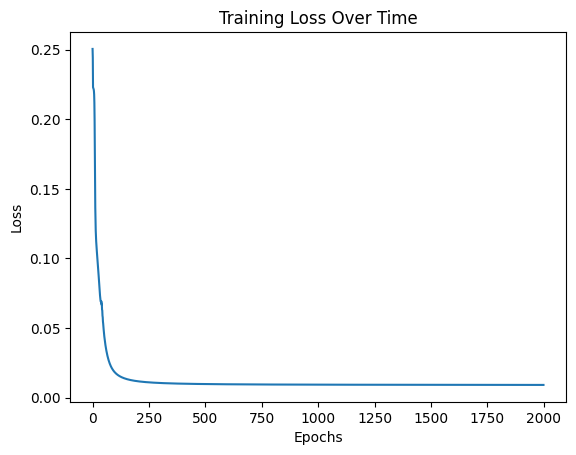

In [ ]:
# Plot the training progress
plt.plot(model.loss_history)
plt.title("Training Loss Over Time")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()